# Wine Quality Workbook

In [1]:
# Import the necessary libraries
import numpy as np
import os
import pandas as pd
import seaborn as sb
sb.set_context("notebook", font_scale=2.5)

from matplotlib import pyplot as plt
from natsort import natsorted

%matplotlib inline

### Load the data

In [2]:
# Load the data into a Pandas DataFrame
red_wine = pd.read_csv('data/winequality-red.csv', sep=';')

## Data Exploration

In [3]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
red_wine.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

### Data Visualization
Make a scatter plot matrix using seaborn to visualize the data and the relationship between the different features.

In [5]:
column_list = list(red_wine.columns)[0:-1]

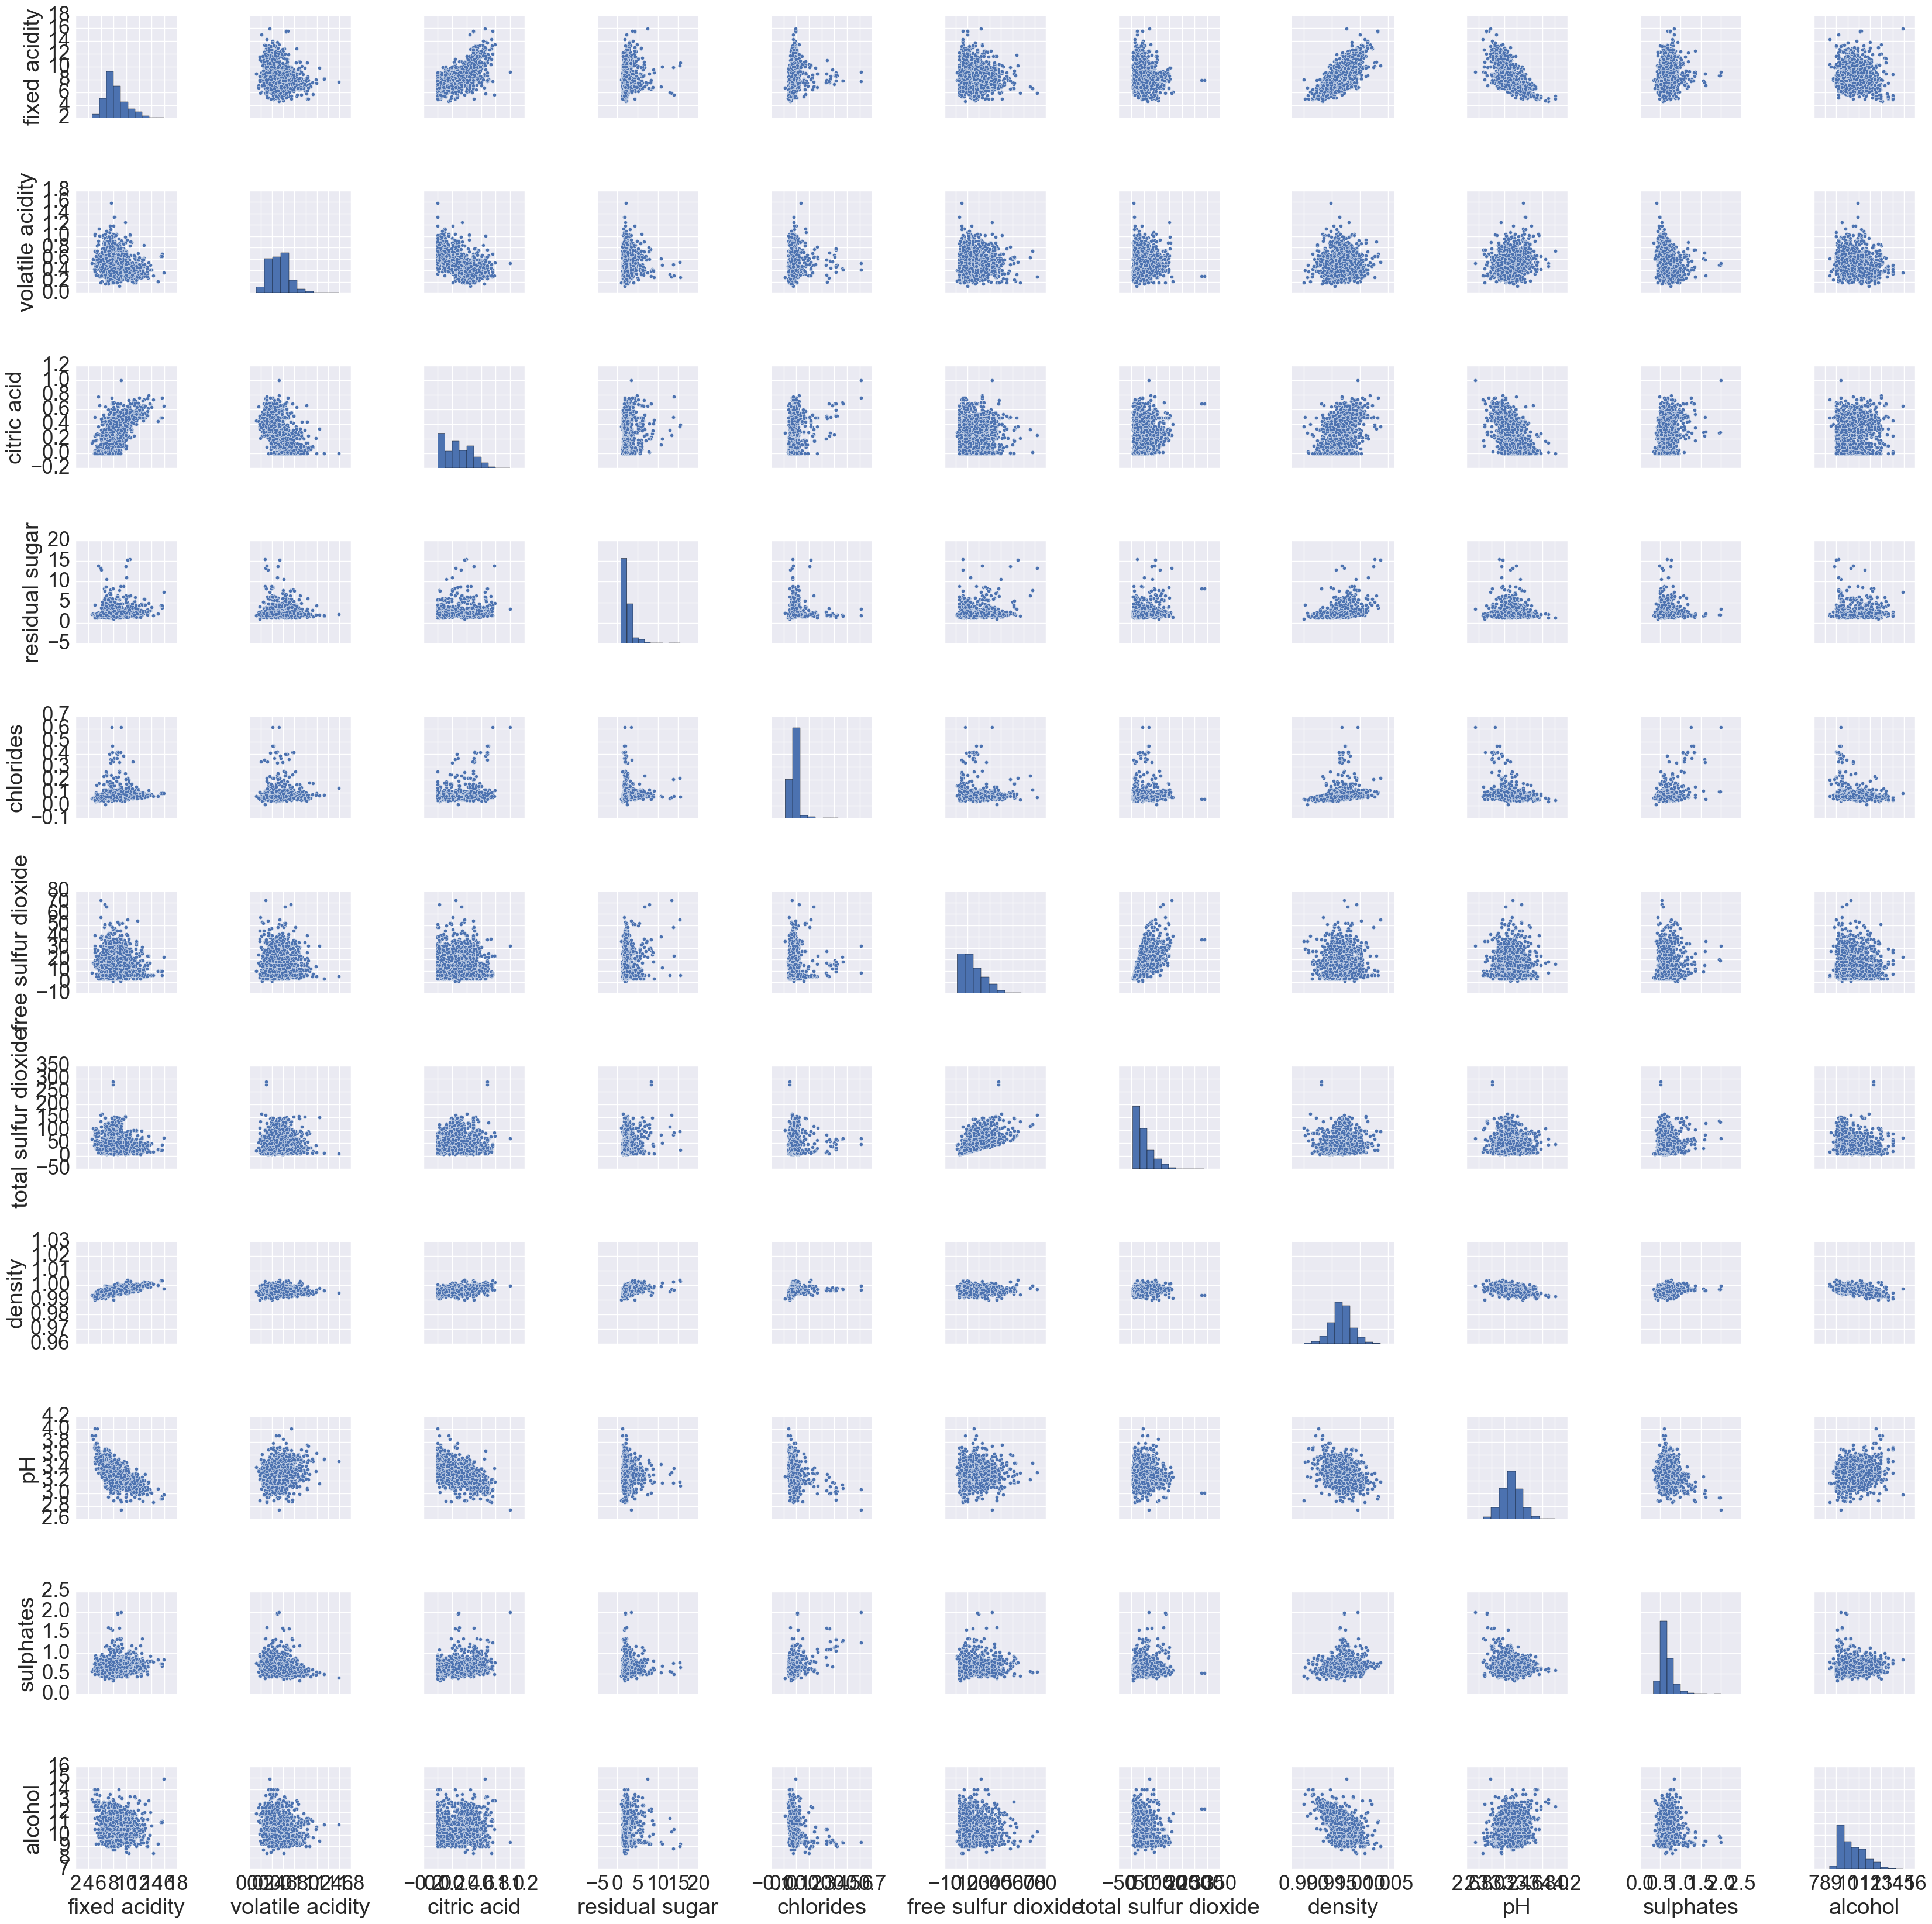

In [6]:
sb.pairplot(red_wine.loc[:,column_list], size=3)

## Data Manipulation
### Normalization
Normalize all features to have a mean of 0 and a standard deviation of 1.

In [7]:
def normalize_data(df, columns):
    for column in columns:
        mean_value = df.loc[:,column].mean()
        stdev = np.std(df.loc[:,column].values)
        df.loc[:,column] = (df.loc[:,column] - mean_value) / stdev
    return df

In [8]:
red_wine_norm = normalize_data(red_wine, column_list)
red_wine_norm.describe().T

count          mean       std       min       25%  \
fixed acidity         1599.0  3.554936e-16  1.000313 -2.137045 -0.700719   
volatile acidity      1599.0  1.733031e-16  1.000313 -2.278280 -0.769931   
citric acid           1599.0 -8.887339e-17  1.000313 -1.391472 -0.929318   
residual sugar        1599.0 -1.244227e-16  1.000313 -1.162696 -0.453218   
chlorides             1599.0  3.910429e-16  1.000313 -1.603945 -0.371229   
free sulfur dioxide   1599.0 -6.221137e-17  1.000313 -1.422500 -0.848716   
total sulfur dioxide  1599.0  4.443669e-17  1.000313 -1.230584 -0.744040   
density               1599.0  2.364032e-14  1.000313 -3.538731 -0.607756   
pH                    1599.0  2.861723e-15  1.000313 -3.700401 -0.655141   
sulphates             1599.0  6.754377e-16  1.000313 -1.936507 -0.638220   
alcohol               1599.0  1.066481e-16  1.000313 -1.898919 -0.866379   
quality               1599.0  5.636023e+00  0.807569  3.000000  5.000000   

                           50%       75%        max  
fixed acidity        -0.241094  0.505795   4.355149  
volatile acidity     -0.043689  0.626688   5.877976  
citric acid          -0.056360  0.765247   3.743574  
residual sugar       -0.240375  0.043416   9.195681  
chlorides            -0.179946  0.053845  11.127035  
free sulfur dioxide  -0.179300  0.490115   5.367284  
total sulfur dioxide -0.257497  0.472318   7.375154  
density               0.001760  0.576825   3.680055  
pH                   -0.007213  0.575922   4.528282  
sulphates            -0.225128  0.424016   7.918677  
alcohol              -0.209308  0.635497   4.202453  
quality               6.000000  6.000000   8.000000

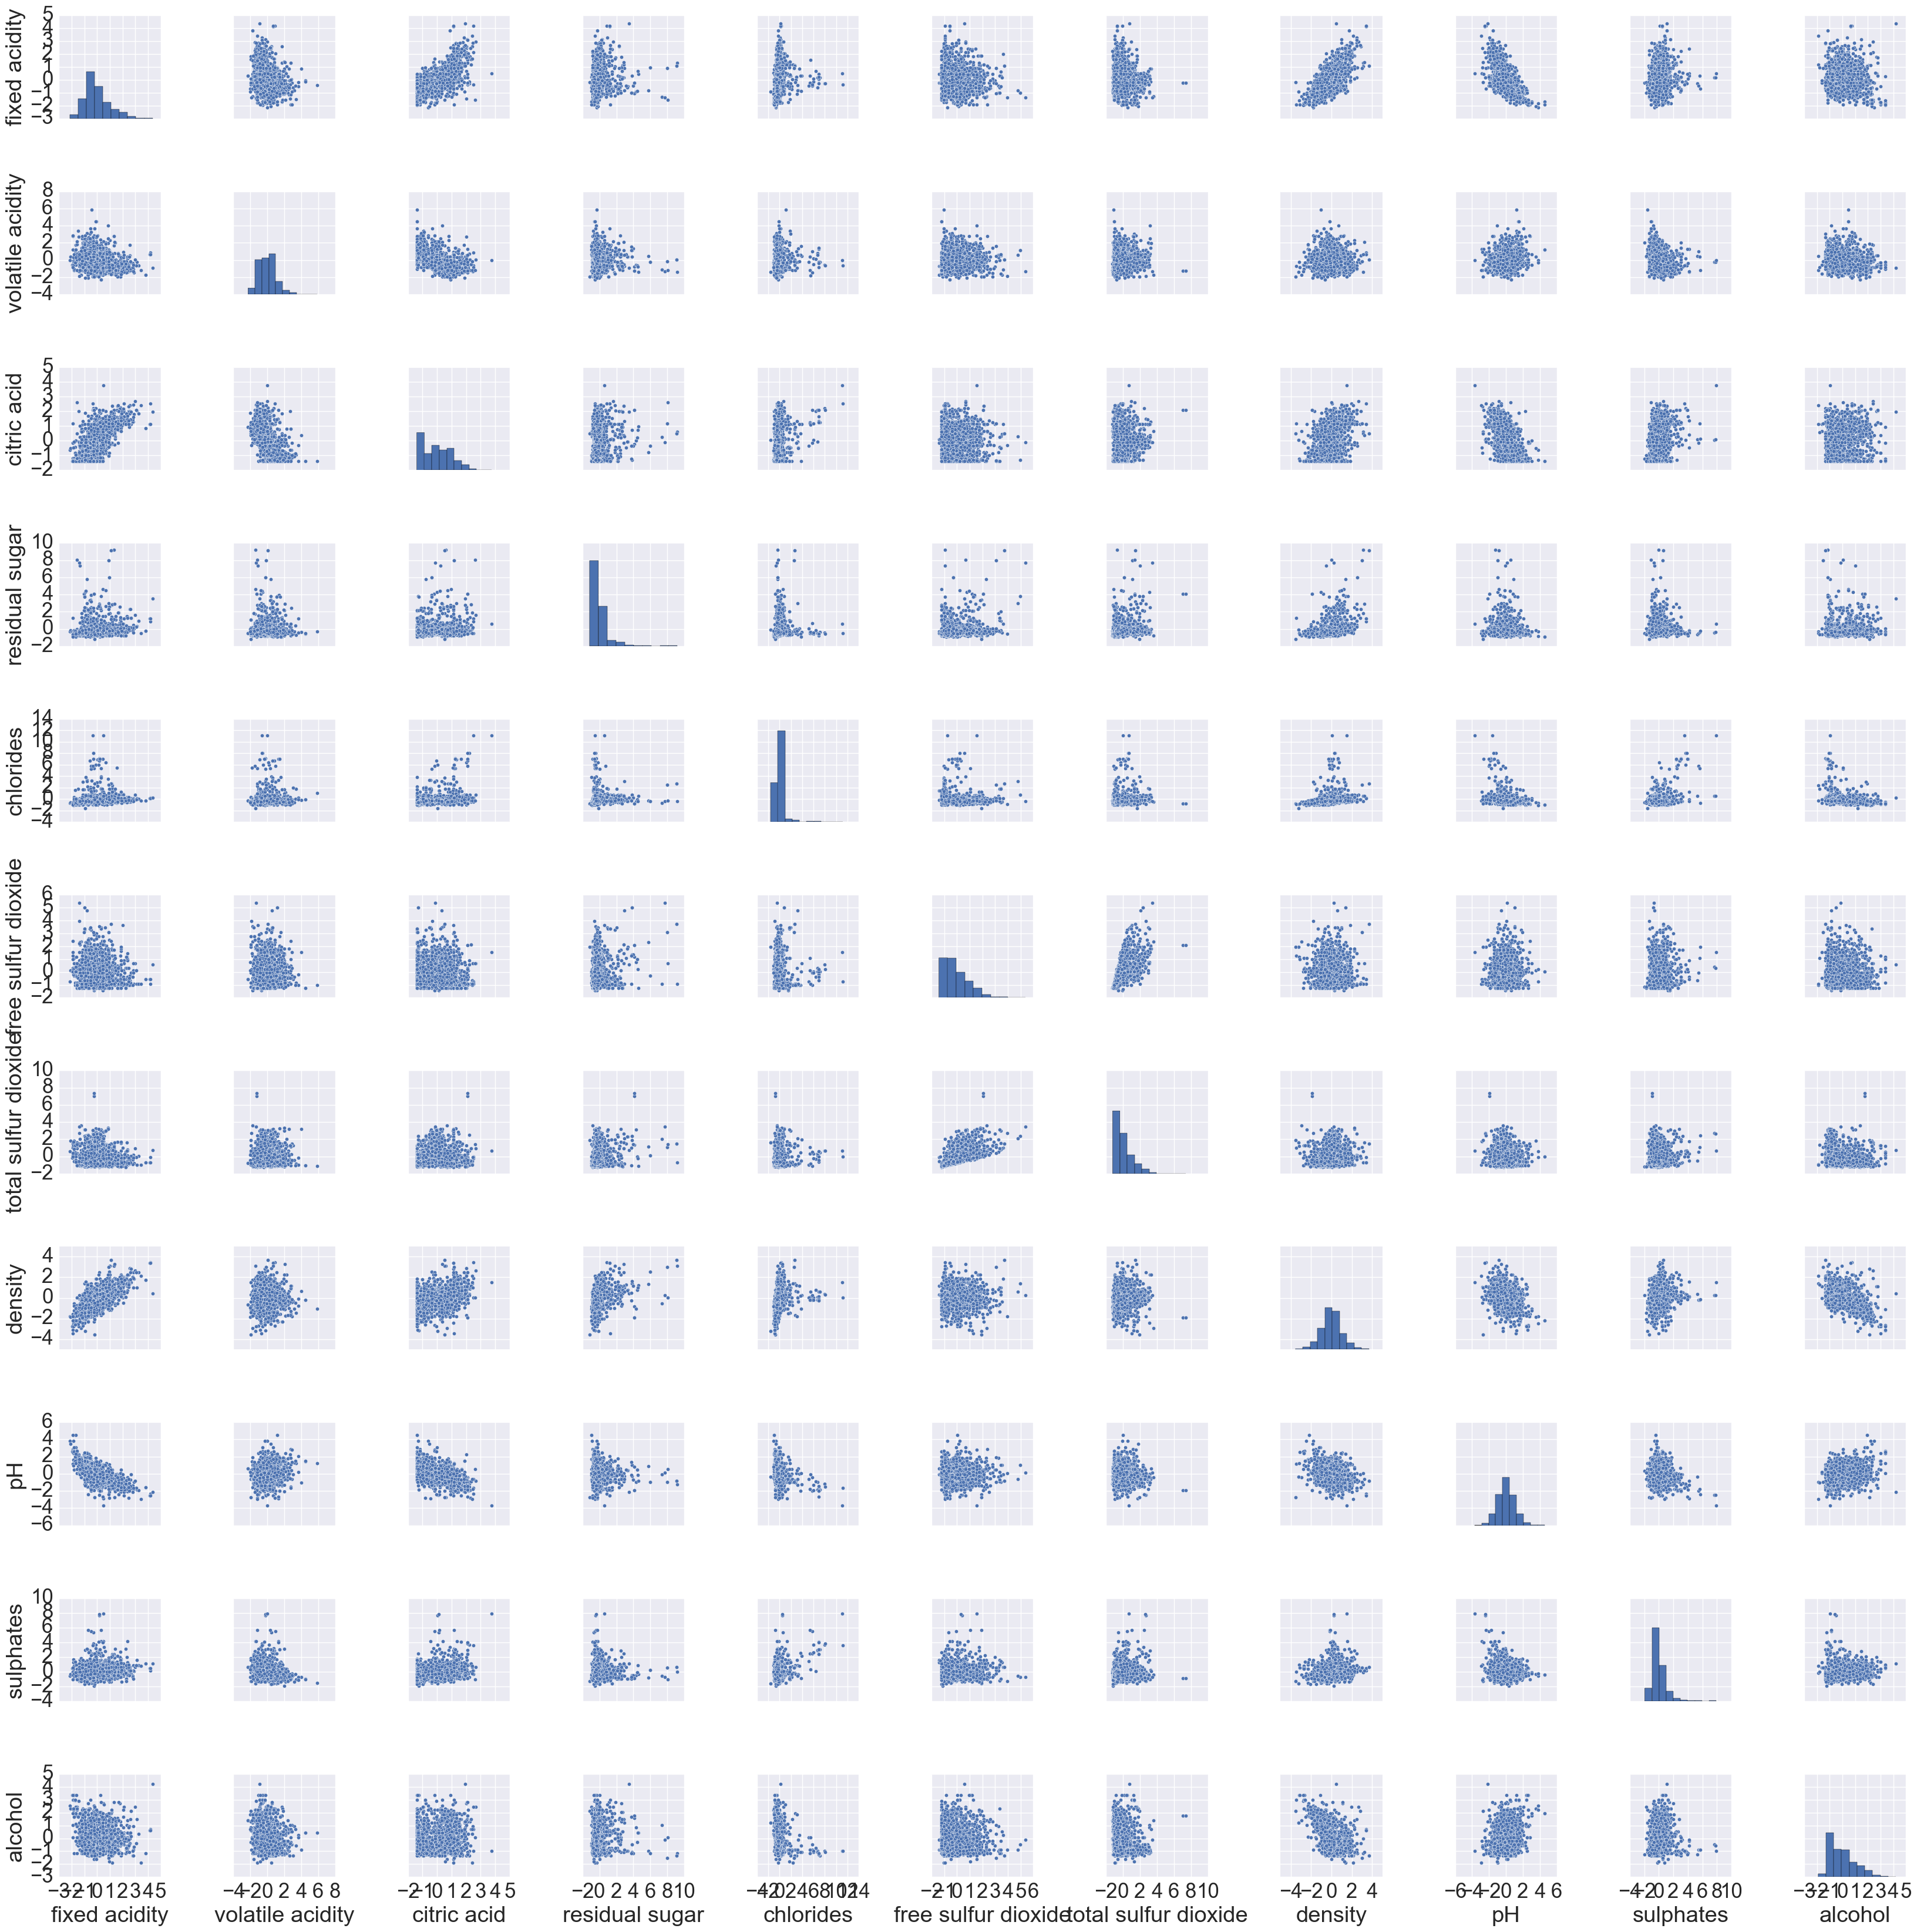

In [9]:
sb.pairplot(red_wine_norm.loc[:,column_list], size=3)

### Remove outliers

In [10]:
def outliers(df, threshold, columns):
    for col in columns: 
        mask = df[col] > float(threshold)*df[col].std()+df[col].mean()
        df.loc[mask == True,col] = np.nan
        mean_property = df.loc[:,col].mean()
        df.loc[mask == True,col] = mean_property
    return df

In [11]:
threshold = 5

In [12]:
red_wine_no_outliers = outliers(red_wine_norm, threshold, column_list[0:-1])

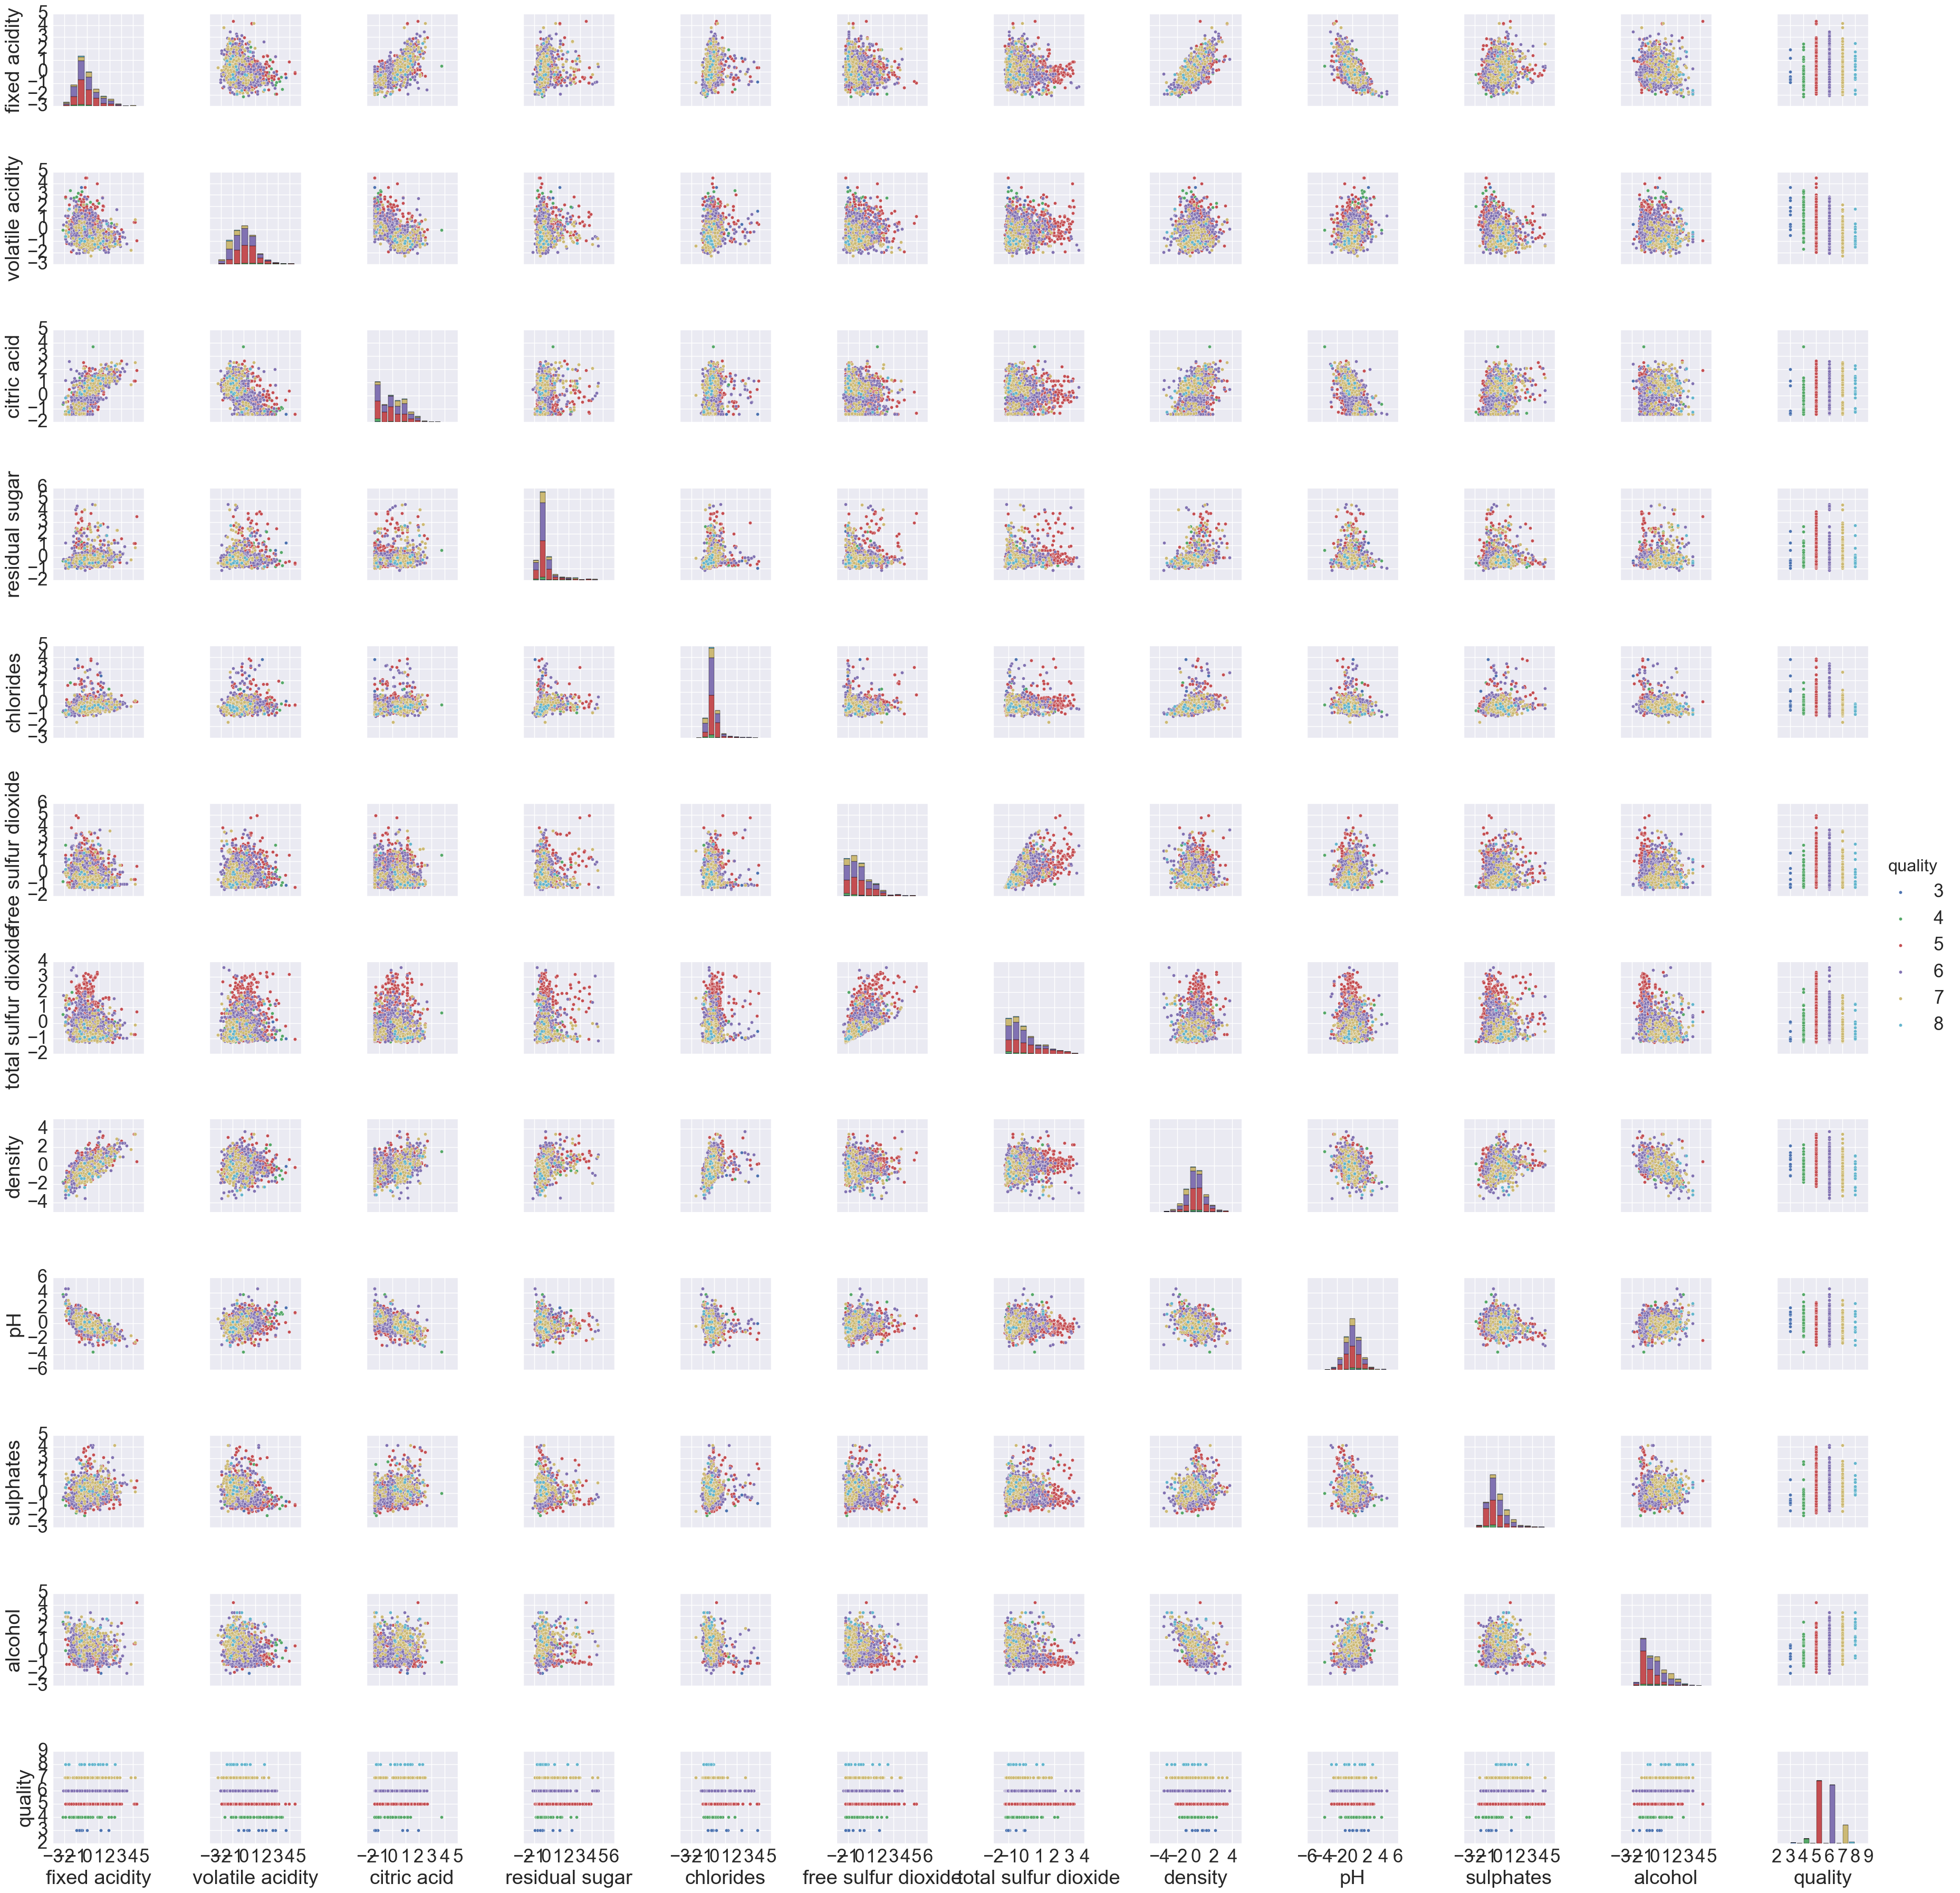

In [13]:
sb.pairplot(red_wine_no_outliers.loc[:,column_list+['quality']], size=3, hue='quality')

### Remove Colinear Features
Use a heatmap in seaborn to view correlations between features.

In [14]:
# sb.set_context("notebook", font_scale=1.5)
# sb.heatmap(red_wine_cleaned.loc[:,column_list].corr())

Remove features that have **`abs(r) > 0.4`**, where r is the correlation index.

In [15]:
# column_list = ['volatile acidity', 'residual sugar', 'chlorides',  
#                'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
# column_list = ['total sulfur dioxide', 'density']

In [16]:
# sb.heatmap(red_wine_cleaned.loc[:,column_list].corr())

In [17]:
# column_list = list(red_wine.columns)[0:-1]
# red_wine_cleaned = red_wine_cleaned.loc[:,column_list+['quality']].copy()

In [18]:
# sb.pairplot(red_wine_cleaned.loc[:,column_list+['quality']], size=3, hue='quality')

### Bin the data by category 

In [19]:
print("The range in wine quality is {0}".format(np.sort(red_wine_no_outliers['quality'].unique())))

The range in wine quality is [3 4 5 6 7 8]


In [20]:
red_wine_no_outliers.groupby(['quality']).count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3                   10                10           10              10   
4                   53                53           53              53   
5                  681               681          681             681   
6                  638               638          638             638   
7                  199               199          199             199   
8                   18                18           18              18   

         chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
quality                                                                       
3               10                   10                    10       10   10   
4               53                   53                    53       53   53   
5              681                  681                   681      681  681   
6              638                  638                   638      638  638   
7              199                  199                   199      199  199   
8               18                   18                    18       18   18   

         sulphates  alcohol  
quality                      
3               10       10  
4               53       53  
5              681      681  
6              638      638  
7              199      199  
8               18       18

Bin the data into two bins: Good wine = [7, 8], Bad wine = [3, 4]

In [21]:
# bins = [3, 4, 6, 8]

In [22]:
# red_wine_cut = red_wine_no_outliers.copy()
# red_wine_cut['category'] = pd.cut(red_wine_cut.quality, bins, 
#                                       labels=['Bad', 'Average','Good'], 
#                                       include_lowest=True)

In [23]:
# red_wine_new_cut = red_wine_cut.copy()
# red_wine_new_cut = red_wine_cut[red_wine_new_cut['category'].isin(['Bad', 'Good'])].copy()
# bins = [3, 5, 8]
# red_wine_new_cut['category'] = pd.cut(red_wine_new_cut.quality, bins, labels=['Bad', 'Good'], include_lowest=True)

In [24]:
red_wine_new_cut = red_wine_no_outliers.copy()
bins = [3, 5, 8]
red_wine_new_cut['category'] = pd.cut(red_wine_new_cut.quality, bins, labels=['Bad', 'Good'], include_lowest=True)

In [25]:
print("The range in wine quality is now {0}".format(np.sort(red_wine_new_cut['quality'].unique())))

The range in wine quality is now [3 4 5 6 7 8]


In [26]:
# Check to make sure data was binned correctly
red_wine_new_cut.loc[red_wine_new_cut.loc[:,'category'] == 'Good',['quality', 'category']].describe()

quality
count  855.000000
mean     6.274854
std      0.491627
min      6.000000
25%      6.000000
50%      6.000000
75%      7.000000
max      8.000000

In [27]:
red_wine_new_cut.loc[red_wine_new_cut.loc[:,'category'] == 'Bad',['quality', 'category']].describe()

quality
count  744.000000
mean     4.901882
std      0.339894
min      3.000000
25%      5.000000
50%      5.000000
75%      5.000000
max      5.000000

In [28]:
# Check to make sure there is an even sample of Good and Bad points
red_wine_new_cut.groupby(['category']).count()

fixed acidity  volatile acidity  citric acid  residual sugar  \
category                                                                 
Bad                 744               744          744             744   
Good                855               855          855             855   

          chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  \
category                                                                       
Bad             744                  744                   744      744  744   
Good            855                  855                   855      855  855   

          sulphates  alcohol  quality  
category                               
Bad             744      744      744  
Good            855      855      855

In [29]:
red_wine_new_cut.describe().T

count          mean       std       min       25%  \
fixed acidity         1599.0  3.554936e-16  1.000313 -2.137045 -0.700719   
volatile acidity      1599.0 -3.678333e-03  0.989440 -2.278280 -0.769931   
citric acid           1599.0 -8.887339e-17  1.000313 -1.391472 -0.929318   
residual sugar        1599.0 -5.310949e-02  0.763606 -1.162696 -0.453218   
chlorides             1599.0 -9.615707e-02  0.551753 -1.603945 -0.371229   
free sulfur dioxide   1599.0 -3.358751e-03  0.991255 -1.422500 -0.848716   
total sulfur dioxide  1599.0 -9.026806e-03  0.967205 -1.230584 -0.744040   
density               1599.0  2.364032e-14  1.000313 -3.538731 -0.607756   
pH                    1599.0  2.861723e-15  1.000313 -3.700401 -0.655141   
sulphates             1599.0 -3.336338e-02  0.879149 -1.936507 -0.638220   
alcohol               1599.0  1.066481e-16  1.000313 -1.898919 -0.866379   
quality               1599.0  5.636023e+00  0.807569  3.000000  5.000000   

                           50%       75%       max  
fixed acidity        -0.241094  0.505795  4.355149  
volatile acidity     -0.043689  0.626688  4.481357  
citric acid          -0.056360  0.765247  3.743574  
residual sugar       -0.240375  0.043416  4.584075  
chlorides            -0.179946  0.032592  3.879515  
free sulfur dioxide  -0.179300  0.490115  4.984761  
total sulfur dioxide -0.257497  0.472318  3.604442  
density               0.001760  0.576825  3.680055  
pH                   -0.007213  0.575922  4.528282  
sulphates            -0.225128  0.424016  4.141840  
alcohol              -0.209308  0.635497  4.202453  
quality               6.000000  6.000000  8.000000

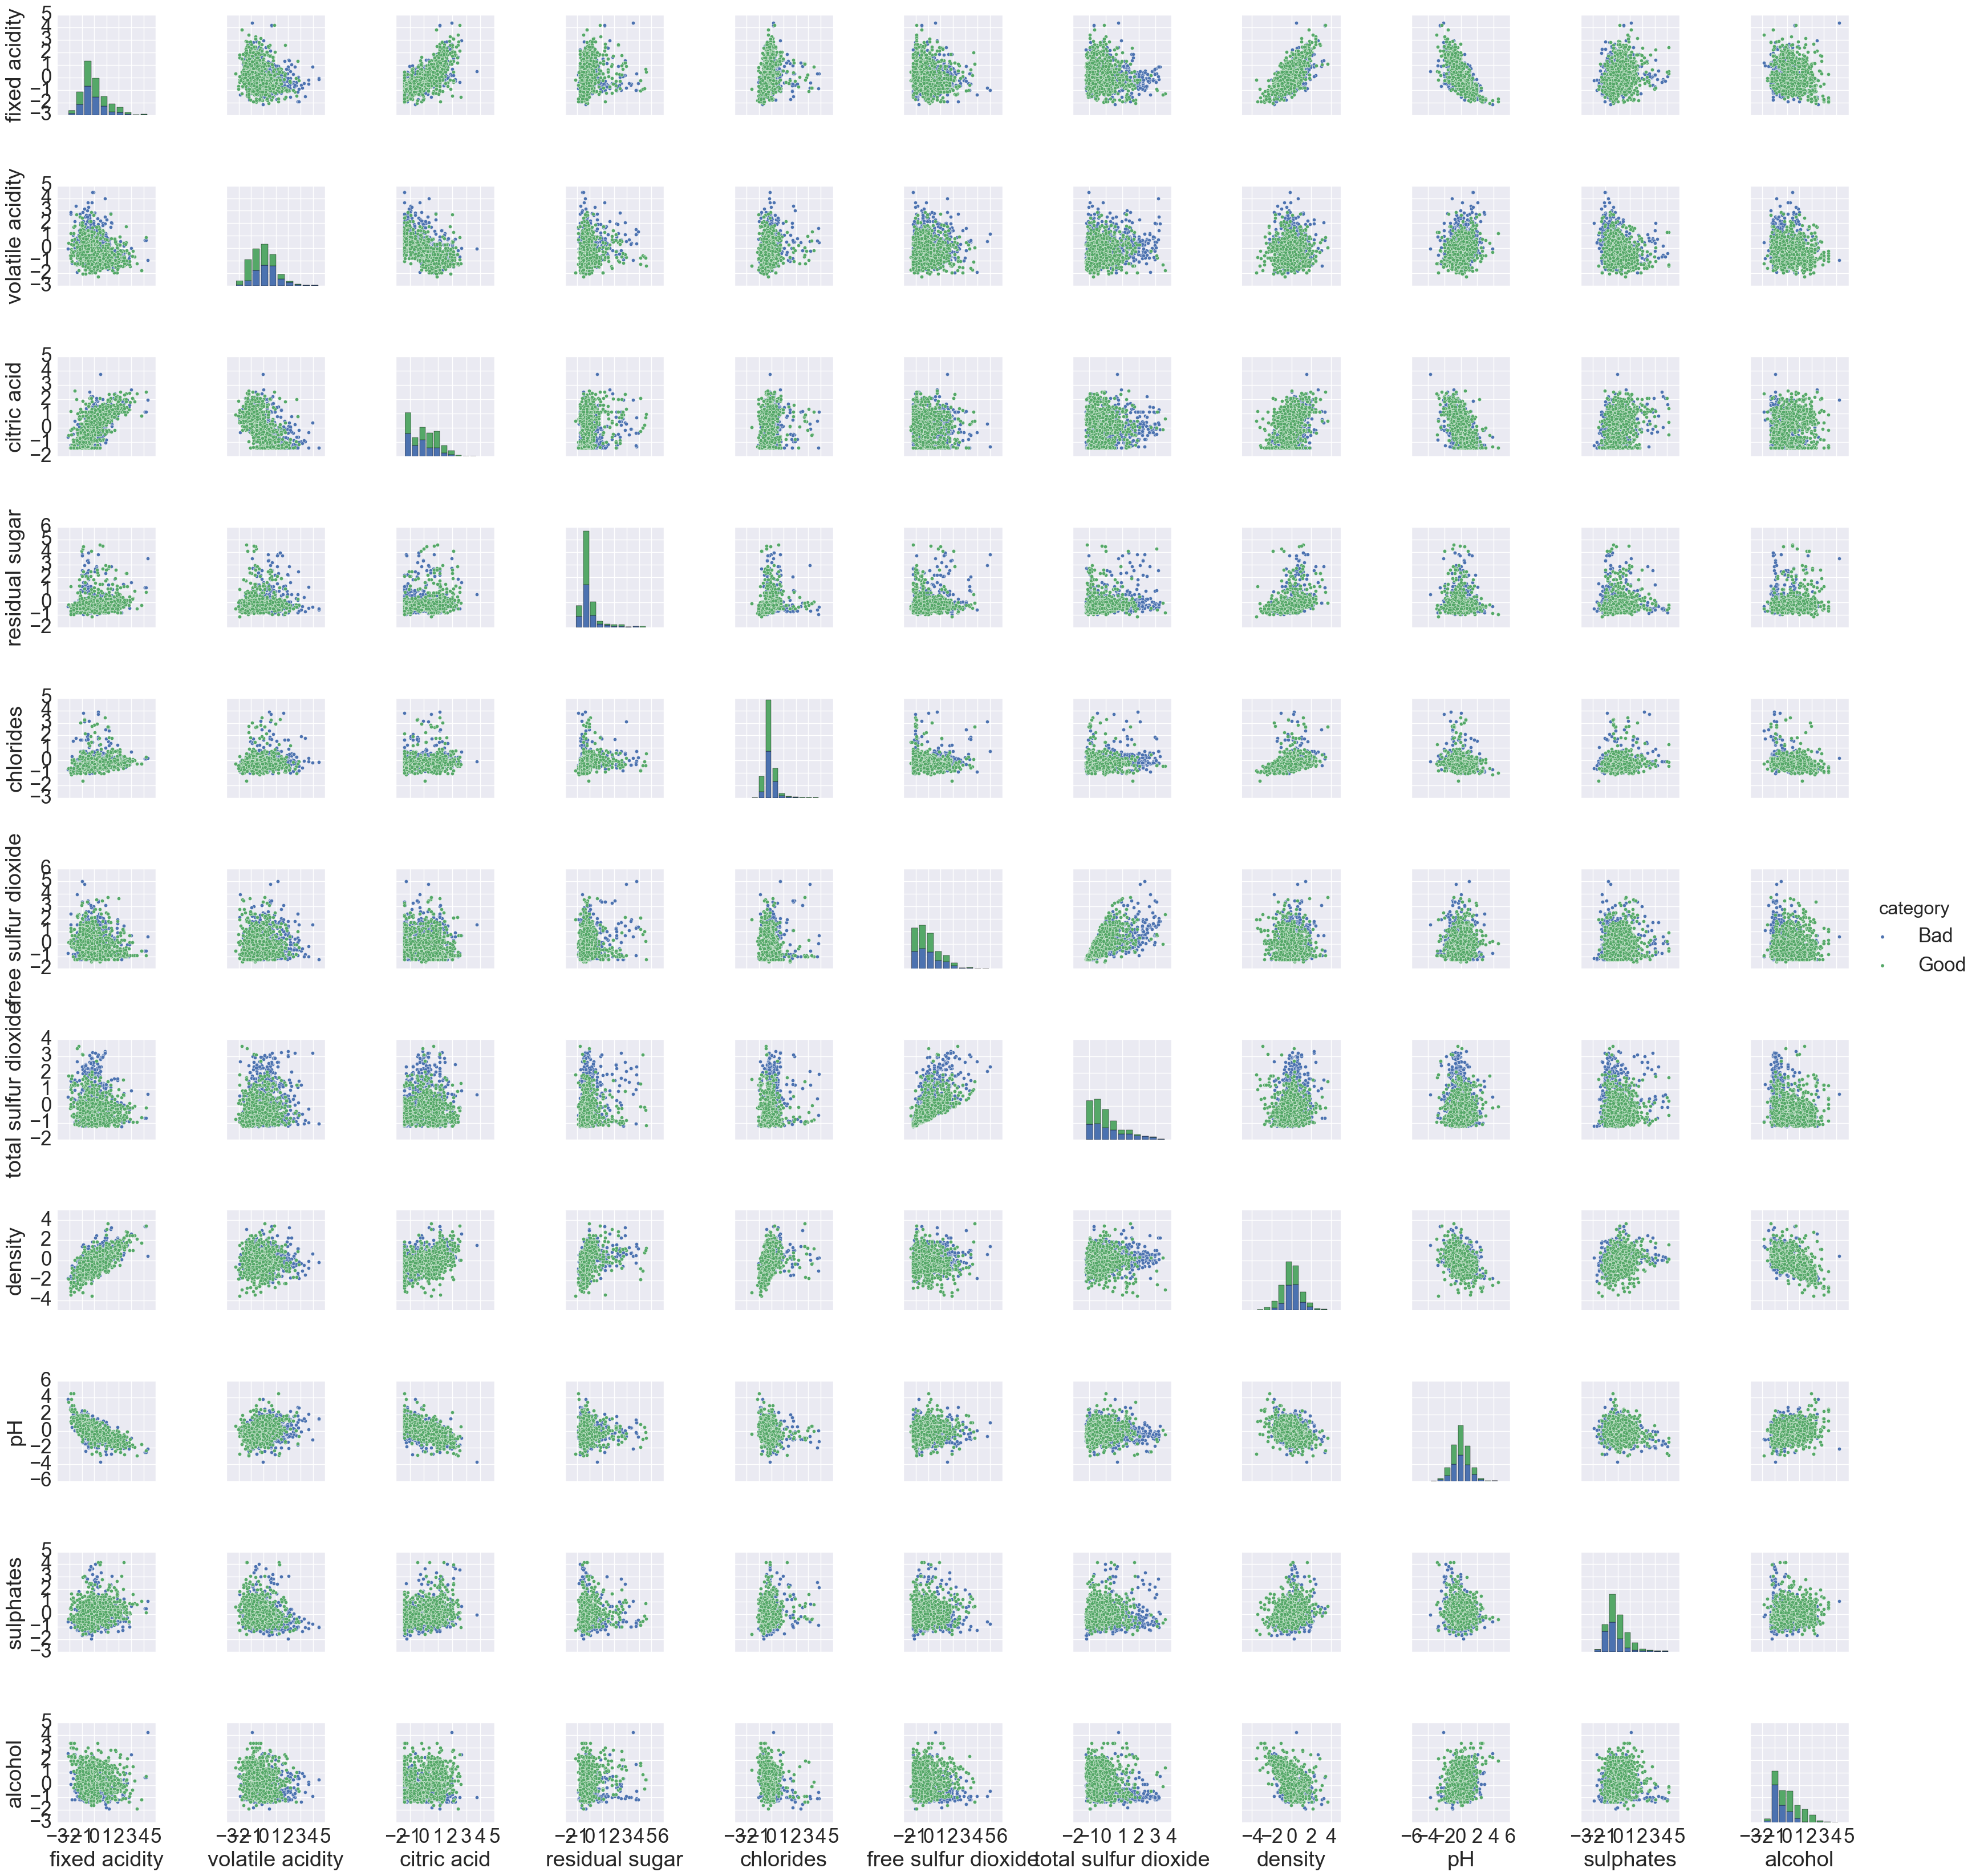

In [30]:
sb.pairplot(red_wine_new_cut.loc[:,column_list+['category']], size=3, hue='category')

In [31]:
red_wine_cleaned = red_wine_new_cut.copy()

### Save cleaned DataFrame to a CSV File

In [32]:
# red_wine_cleaned.to_csv('data/winequality-red-cleaned.csv', index=False)

## TensorFlow

In [33]:
import tensorflow as tf

/Users/dave/anaconda/envs/python3_tf/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
import sklearn
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split

Convert y-labels from strings to integers. Bad = 0, Good = 1.

In [35]:
y_red_wine = red_wine_cleaned[['category']].get_values()

In [36]:
X_red_wine = red_wine_cleaned.iloc[:,1:-2].get_values()

In [37]:
y_red_wine_raveled = y_red_wine.ravel()
y_red_wine_integers = [y.replace('Bad', '0') for y in y_red_wine_raveled]
y_red_wine_integers = [y.replace('Good', '1') for y in y_red_wine_integers]
y_red_wine_integers = [np.int(y) for y in y_red_wine_integers]
# y_red_wine_integers = np.array([[np.int(y)] for y in y_red_wine_integers]).reshape(-1,1)

In [38]:
def dense_to_one_hot(labels_dense, num_classes=2):
    labels_one_hot = []
    for label in labels_dense:
        indices = [0]*num_classes
        indices[label] = 1
        labels_one_hot.append(indices)
    
    return labels_one_hot

In [39]:
y_one_hot = dense_to_one_hot(y_red_wine_integers, num_classes=2)

Split the data into train/test split.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_red_wine, y_one_hot, test_size=0.2, random_state=42)

In [41]:
print(y_one_hot[0:5])

[[1, 0], [1, 0], [1, 0], [0, 1], [1, 0]]


In [42]:
# Function to create directories to store model summaries for TensorBoard
def create_log_directory():
    
    cwd = os.getcwd()
    fpath = cwd+'/tmp/logs'
    try:
        dirlist = os.listdir(fpath)
        dirlist_parsed = [x.split('_') for x in dirlist]
        dirlist_parsed_prefix = [x.split('_')[0] for x in dirlist]
        dirlist_parsed_suffix = [x.split('_')[-1] for x in dirlist]

        dirarray = np.array(dirlist)
        dirarray_parsed_prefix = np.array(dirlist_parsed_prefix)
        dirarray_sorted_suffix = np.array(natsorted(dirlist_parsed_suffix))
    
        num_run_dirs = np.sum(dirarray_parsed_prefix == 'run')
    
    except OSError:
        os.mkdir(fpath)
        num_run_dirs = 0

    # Check if run_1 directory exisits
    if num_run_dirs == 0:
        os.mkdir(fpath+'/run_1')
        log_directory = 'tmp/logs/run_1'
    else:
        previous_run_number = np.int(dirarray_sorted_suffix[-1])
        next_run = previous_run_number + 1
        next_run_string = np.str(next_run)
        next_run_directory = '/run_'+next_run_string
        os.mkdir(fpath+next_run_directory)
        log_directory = 'tmp/logs/run_'+next_run_string

    print('Saving summaries to '+log_directory+'/')    
        
    return log_directory

### Define Batch Function

In [43]:
def make_batch(X, y, batch_size):
    
    y_size = len(y)
    index_sample = np.random.choice(y_size, batch_size, replace=False)
    y_array = np.array(y)
    
    X_batch = X[index_sample]
    y_batch = y_array[index_sample]
    
    return X_batch, y_batch

### Define hyperparameters

In [44]:
def reset_graph():
    if 'sess' in globals() and sess:
        sess.close()
    tf.reset_default_graph()

In [216]:
# Reset graph is session isn't closed
reset_graph()

In [217]:
learning_rate = 0.001
batch_size = int(X_train.shape[0] / 5)
num_features = X_train.shape[1]
num_classes = 2
epochs = 1000
epochs_to_print = epochs / 10

In [218]:
X = tf.placeholder(tf.float32, [None, num_features])
y_ = tf.placeholder(tf.float32, [None, num_classes])

### Define Softmax Layer
Use softmax regression to model the data. Set up the model weights and biases.

In [219]:
def softmax_layer(X_tensor, num_classes, num_features):
    W = tf.Variable(tf.zeros([num_features, num_classes]))
    b = tf.Variable(tf.zeros([num_classes]))
    y = tf.nn.softmax(tf.matmul(X_tensor, W) + b)
    return y

### Define Cost Function

Minimize the error using cross entropy.

In [220]:
def define_cost_function(y, y_):
    cost = -tf.reduce_sum(y_ * tf.log(y))
    return cost

### Define the training step
Define the optimizer. I use gradient descent.

In [222]:
def train(cost, learning_rate):
    training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    return training_step

### Check model accuracy during training

In [223]:
def compute_accuracy(y, y_):
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    return accuracy

### Setup TensorFlow Graph

In [224]:
# Create logits from sigmoid layer and softmax layer
# with tf.name_scope("logits") as scope:
#     y_sigmoid = sigmoid_layer(X, 1)

# Create softmax layer
with tf.name_scope("softmax") as scope:
    y = softmax_layer(X, num_classes, num_features)

# Define cost function
with tf.name_scope("cost_function") as scope:
    cost = define_cost_function(y, y_)
    tf.scalar_summary("cost", cost)
    
# Define training step
with tf.name_scope("training") as scope:
    training_step = train(cost, learning_rate)

# Calculate model accuracy
with tf.name_scope("accuracy") as scope:
    accuracy = compute_accuracy(y, y_)
    tf.scalar_summary("accuracy", accuracy)

In [225]:
# Merge summaries for TensorBoard
merged_summaries = tf.merge_all_summaries()

with tf.Session() as sess:

    log_directory = create_log_directory()
    summary_writer = tf.train.SummaryWriter(log_directory, sess.graph)
    
    tf.initialize_all_variables().run()
    
    # average_cost = 0
    cost_sum = 0
    for i in range(epochs):
        
        X_batch, y_batch = make_batch(X_train, y_train, batch_size)
        sess.run(training_step, feed_dict={X: X_batch, y_: y_batch})
        current_cost = sess.run(cost, feed_dict={X: X_batch, y_: y_batch})
        cost_sum += current_cost
        
        # Print average cost periodically
        if i % epochs_to_print == 99:
            average_cost = cost_sum / epochs_to_print
            print("Epoch: {:4d}, average cost = {:0.3f}".format(i, average_cost))
            cost_sum = 0
    
    print('Finished model fitting.')
 
    # Calculate final accuracy
    X_batch, y_batch = make_batch(X_test, y_test, batch_size)
    print("Final accuracy = {:0.3f}".format(sess.run(accuracy, feed_dict={X: X_test, y_: y_test})))

Saving summaries to tmp/logs/run_61/
Epoch:   99, average cost = 133.489
Epoch:  199, average cost = 131.465
Epoch:  299, average cost = 130.699
Epoch:  399, average cost = 130.114
Epoch:  499, average cost = 130.712
Epoch:  599, average cost = 130.569
Epoch:  699, average cost = 130.436
Epoch:  799, average cost = 132.055
Epoch:  899, average cost = 131.757
Epoch:  999, average cost = 132.604
Finished model fitting.
Final accuracy = 0.750
